<a href="https://colab.research.google.com/github/GaryMarmon/vim/blob/master/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from mlxtend.plotting import plot_decision_regions

import warnings
warnings.filterwarnings("ignore")

#plt.style.use('fivethirtyeight')

import iris dataset for classification.
This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

The target classes (Setosa, Versicolour, Virginica) are represented by (1, 2, 3)

In [3]:
df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
132,6.4,2.8,5.6,2.2,2.0
8,4.4,2.9,1.4,0.2,0.0
13,4.3,3.0,1.1,0.1,0.0
56,6.3,3.3,4.7,1.6,1.0
32,5.2,4.1,1.5,0.1,0.0
105,7.6,3.0,6.6,2.1,2.0
69,5.6,2.5,3.9,1.1,1.0
30,4.8,3.1,1.6,0.2,0.0
138,6.0,3.0,4.8,1.8,2.0
33,5.5,4.2,1.4,0.2,0.0


each class has 50 samples in the dataset

In [4]:
df.groupby('target').size()

target
0.0    50
1.0    50
2.0    50
dtype: int64

create test and train sets

In [5]:
X = df[['sepal length (cm)',	'sepal width (cm)',	'petal length (cm)',	'petal width (cm)']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size=0.4, stratify=y)

In [6]:
test_set = pd.merge(X_test, y_test, left_index=True, right_index=True)

# Support Vector Classifier

In [7]:
svc = SVC(kernel='linear')
svc_preds = svc.fit(X_train, y_train).predict(X_test)
print(f'SVC accuracy = {metrics.accuracy_score(svc_preds, y_test)}')

SVC accuracy = 0.95


In [8]:
report = metrics.classification_report(y_test, svc_preds, target_names=['Setosa', 'Versicolour', 'Virginica'])
print(report)

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        20
 Versicolour       0.90      0.95      0.93        20
   Virginica       0.95      0.90      0.92        20

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



In [9]:
confmtrx = np.array(confusion_matrix(y_test, svc_preds))

pd.DataFrame(confmtrx, index=['Setosa', 'Versicolour', 'Virginica'],
columns=['predicted_Setosa', 'predicted_Versicolour', 'predicted_Virginica',])

,predicted_Setosa,predicted_Versicolour,predicted_Virginica
Setosa,20,0,0
Versicolour,0,19,1
Virginica,0,2,18


Text(0.5, 1.0, 'Decision Boundaries')

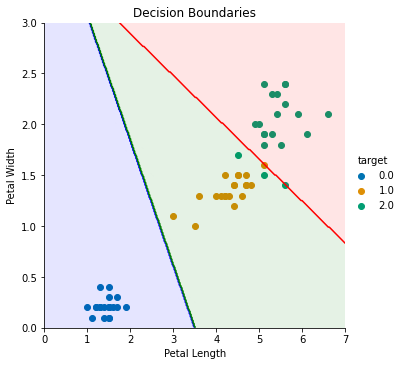

In [11]:
two_predictors = ['petal length (cm)',	'petal width (cm)']
lda = LinearDiscriminantAnalysis()
y_pred = lda.fit(X_train[two_predictors], y_train).predict(X_test[two_predictors])

N = 300
X = np.linspace(0, 7, N)
Y = np.linspace(0, 3, N)
X, Y = np.meshgrid(X, Y)

plot = (sns.FacetGrid(test_set, hue="target", height=5, palette = 'colorblind')
  .map(plt.scatter,'petal length (cm)',	'petal width (cm)')
  .add_legend())
my_ax = plot.ax

zz = np.array([lda.predict(np.array([[xx,yy]])) for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
Z = zz.reshape(X.shape)

#Fill Boundry
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))
my_ax.set_xlabel('Petal Length')
my_ax.set_ylabel('Petal Width')
my_ax.set_title('Decision Boundaries')

#KNN

In [52]:
#K-Nearest Neighbors using k=3
knnc = KNeighborsClassifier(n_neighbors=3)
knnc.fit(X_train, y_train) #fit model on the train set
preds = knnc.predict(X_test) #predict on the test set
print(f'KNN accuracy (k=3) = {metrics.accuracy_score(preds, y_test)}')

KNN accuracy (k=3) = 0.9666666666666667


In [62]:
report = metrics.classification_report(y_test, preds, target_names=['Setosa', 'Versicolour', 'Virginica'])
print(report)

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        20
 Versicolour       0.95      0.95      0.95        20
   Virginica       0.95      0.95      0.95        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



confustion matrix: 1 mislabeled Versicolour and 1 mislabeled Virginica

In [64]:
confmtrx = np.array(confusion_matrix(y_test, preds))

pd.DataFrame(confmtrx, index=['Setosa', 'Versicolour', 'Virginica'],
columns=['predicted_Setosa', 'predicted_Versicolour', 'predicted_Virginica',])

,predicted_Setosa,predicted_Versicolour,predicted_Virginica
Setosa,20,0,0
Versicolour,0,19,1
Virginica,0,1,19


test accuracy for different values of K. 

*  accuracy between 96-97% is acheieved with odd values of K up to 11
*  When K > 11, performance drops




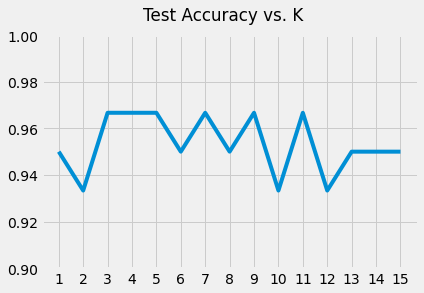

In [116]:
 # try different k
scores = pd.Series(dtype = 'float')
for i in list(range(1,16)): #testing values of K up to 15
    knnc=KNeighborsClassifier(n_neighbors=i) 
    knnc.fit(X_train, y_train)
    pred=knnc.predict(X_test)
    scores = scores.append(pd.Series(metrics.accuracy_score(pred, y_test)))
    
plt.plot(list(range(1,16)), scores)
plt.suptitle("Test Accuracy vs. K")
plt.xticks(list(range(1,16)))
plt.ylim(0.9,1);

In [110]:
def compare_knn_graphs(data, k):
 x = data[["petal length (cm)", "petal width (cm)"]].values
 y = data['target'].astype(int).values
 knnc = KNeighborsClassifier(n_neighbors=k)
 knnc.fit(x, y)
# Plotting decision region
 plot_decision_regions(x, y, clf=knnc, legend=2)
# Adding axes annotations
 plt.xlabel("petal length (cm)")
 plt.ylabel("petal width (cm)")
 plt.title(f'KNN K= {k}')
 plt.show()

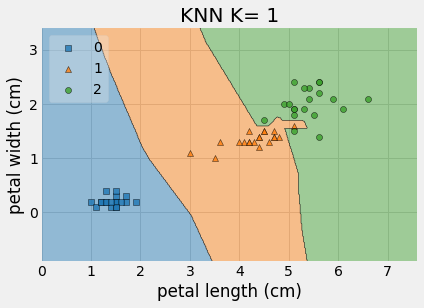

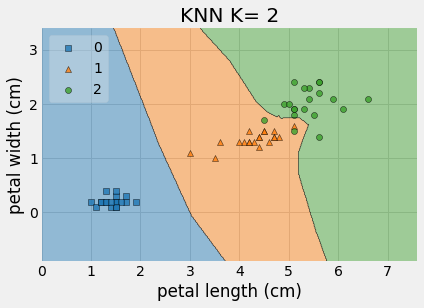

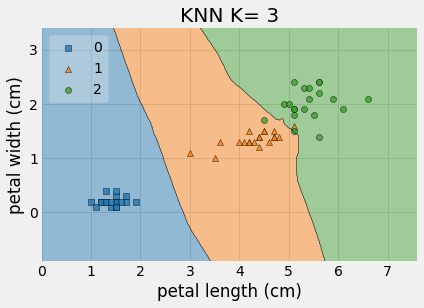

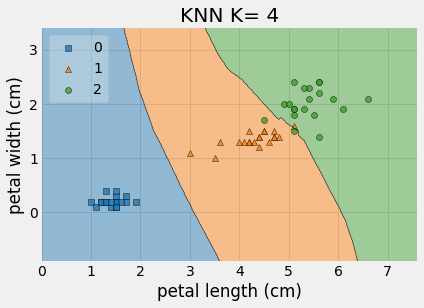

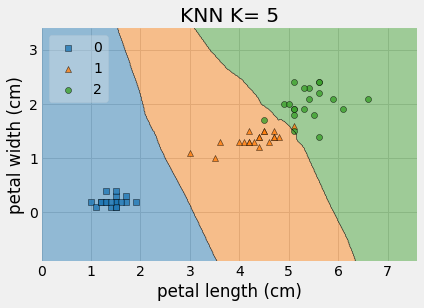

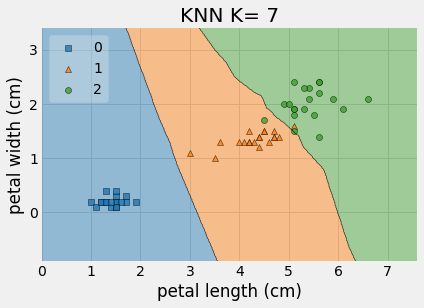

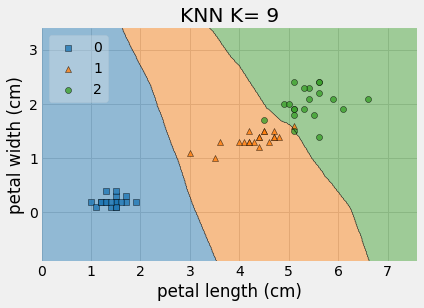

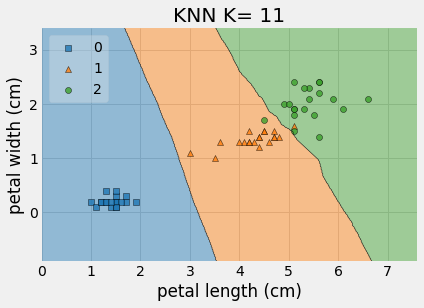

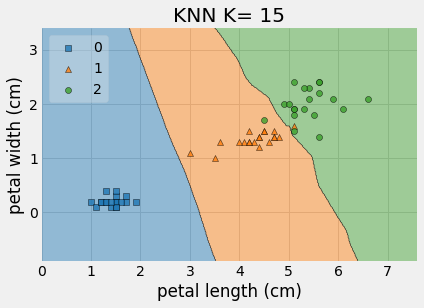

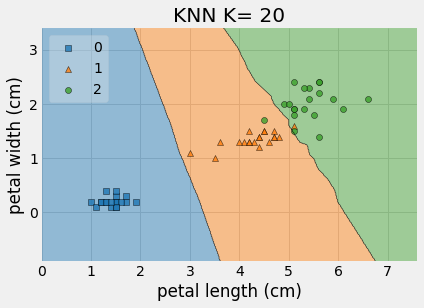

In [115]:
for i in [1,2,3,4,5,7,9,11,15,20]:
    compare_knn_graphs(test_set, i)